In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
%matplotlib inline

In [3]:
train_x = []
train_y = []

with open("./train_data.dat") as f:
    for line in f.readlines():
        line = re.split('\s', line)
        x, y = filter(lambda s: s != "", line)
        train_x.append(float(x))
        train_y.append(float(y))
        
train_x = np.array(train_x)
train_y = np.array(train_y)

In [48]:
test_x = []

with open("./test_data.dat") as f:
    for line in f.readlines():
        test_x.append(float(line))
        
test_x = np.array(test_x)

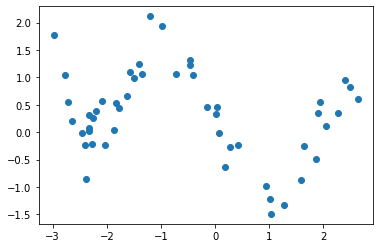

In [49]:
plt.scatter(train_x, train_y)
plt.show()

In [64]:
gen_poly_func = lambda b : lambda x: np.array([x**i for i in range(b)]).T
basis_funcs = lambda x: gen_poly_func(5)(x)
phi_x = np.vectorize(basis_funcs, signature='(n)->(n,m)')
phi = phi_x(train_x) 
print(phi.shape)

(50, 5)


In [65]:
phi_dagger = np.linalg.inv(phi.T @ phi) @ phi.T
print(phi_dagger.shape, train_y.shape)
theta_hat = phi_dagger @ train_y

(5, 50) (50,)


In [66]:
print(theta_hat.shape)  # b × 1
print(phi_x(test_x).shape)  # n × b

test_y = np.einsum('b,nb->n', theta_hat, phi_x(test_x))

(5,)
(50, 5)


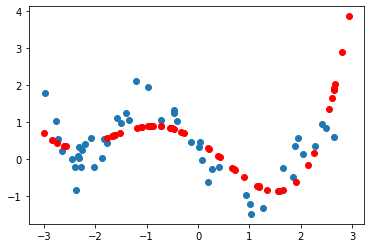

In [68]:
plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, c='red')
plt.show()